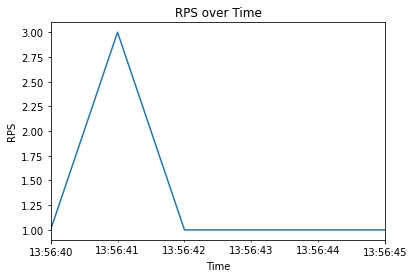

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of timestamps
timestamps = [1555595800, 1555595801, 1555595801, 1555595801, 1555595802, 1555595803, 1555595804, 1555595805]

# Convert the timestamps to a Pandas series
timestamps_series = pd.Series(timestamps, name='timestamps')

# Create a time series index from the timestamps
timestamps_series.index = pd.to_datetime(timestamps_series, unit='s')

# Calculate the requests per second by resampling the time series to 1 second intervals
rps = timestamps_series.resample('S').count()

# Plot the RPS data
rps.plot(kind='line')

# Add labels and title to the plot
plt.xlabel('Time')
plt.ylabel('RPS')
plt.title('RPS over Time')

# Show the plot
plt.show()

In [5]:
df = pd.read_csv('time_dynamic4.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38974 entries, 0 to 38973
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   metric_name        38974 non-null  object 
 1   timestamp          38974 non-null  int64  
 2   metric_value       38974 non-null  float64
 3   check              2766 non-null   object 
 4   error              0 non-null      float64
 5   error_code         0 non-null      float64
 6   expected_response  24894 non-null  object 
 7   group              0 non-null      float64
 8   method             24894 non-null  object 
 9   name               24894 non-null  object 
 10  proto              24894 non-null  object 
 11  scenario           38724 non-null  object 
 12  service            0 non-null      float64
 13  status             24894 non-null  float64
 14  subproto           0 non-null      float64
 15  tls_version        0 non-null      float64
 16  url                248

In [7]:
print(df['extra_tags'].unique())

[nan 'test_type=resnet' 'test_type=rnnt']


In [8]:
df = df[df['metric_name']=='checks'] 

In [9]:
df.index = pd.to_datetime(df['timestamp'], unit='s')
df = df.loc[:, ['extra_tags']]

In [10]:
counts = df.groupby('extra_tags').resample('S').size()
counts = counts.rename('throughput(req/s)')
counts = counts.reset_index()
counts['timestamp'] = (counts['timestamp'] - counts['timestamp'].min()).dt.total_seconds()
#pd.set_option('display.max_rows', None)
#counts

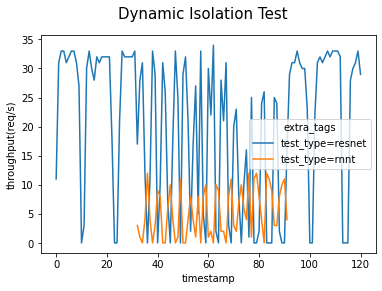

In [14]:
# Plot the resulting DataFrame using Seaborn's lineplot with 'timestamp' on the x-axis, 'rps' on the y-axis, and 'type' as the hue
import seaborn as sns
sns.lineplot(data=counts, x='timestamp', y='throughput(req/s)', hue='extra_tags')
plt.suptitle('Dynamic Isolation Test', fontsize=15)
# Show the plot
plt.savefig("DynamicTime.svg", format="svg")


In [204]:
total = df.groupby('extra_tags').size()

In [205]:
rps_avg = total / 120

In [206]:
rps_avg

extra_tags
test_type=resnet    20.425
test_type=rnnt       2.625
dtype: float64